# Time Series Classification

Consider the schematic below as illustration of the task of time series classification.

Suppose you have a system that outputs one of two possible time series, shown in red and blue. Having learnt how the red and blue time series behave, we have been given an unlabeled time series. Our task is to now classify it as a red or a blue time series.

<img src="images/tsc.png">
Time series classification schematic [1]

We discussed previously how using the time series data points as features for a classifier won't work.

Why not extract a set of features from the time series that will help discriminate between the two kinds of data sets?

This is feature-based time series classification.

The idea is to first transform the time series into their descriptive statistics. Then, use these as features in classifiers.

<img src="images/pipeline.png">
Feature-based time series classification pipeline [1]

Let's see an example.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from aeon.datasets import load_italy_power_demand

/home/malayaja/anaconda3/envs/soft2/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
from aeon.transformations.collection.catch22 import Catch22
from aeon.classification.feature_based import Catch22Classifier, FreshPRINCEClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
X_train, y_train = load_italy_power_demand(split="train")
X_test, y_test = load_italy_power_demand(split="test")

In [5]:
X_test = X_test[:50]
y_test = y_test[:50]

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(67, 1, 24) (67,) (50, 1, 24) (50,)


In [7]:
my_list = [X_train[ii][0] for ii in range(X_train.shape[0])]
df_train = pd.DataFrame({"ts": my_list, "label": y_train})

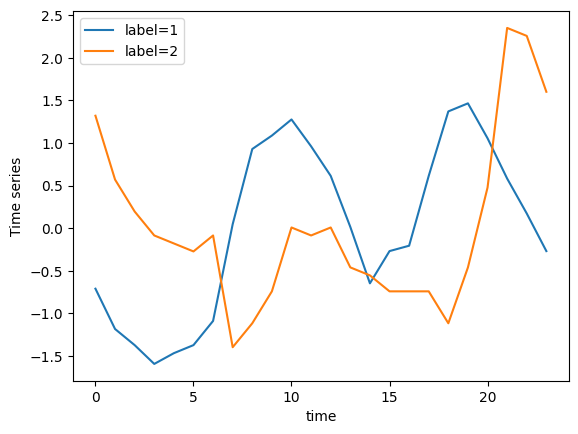

In [8]:
ts_1 = df_train[df_train["label"]=="1"]["ts"].values[0]
plt.plot(ts_1, "C0", label="label=1")

ts_2 = df_train[df_train["label"]=="2"]["ts"].values[0]
plt.plot(ts_2, "C1", label="label=2")

plt.legend()
plt.xlabel("time")
plt.ylabel("Time series")
plt.show()

Catch22:
- hctsa: is a Matlab software package for running highly comparative time-series analysis [2]. It extracts thousands of time series features.
- Catch22: Canonical time series characteristics are 22 hctsa features. They have been found to be the most discrimonatory features from the full htsca set.

Catch22Classifier:
- The Catch22Classifier is a pipeline comprised of a Catch22 transformation and a sklearn classifier (random forest classifier by default).

In [9]:
c22 = Catch22()
x_trans = c22.fit_transform(X_train)
x_trans.shape

(67, 22)

^See, we have indeed extracted 22 features from our training set time series.

Now, let's use the `Catch22Classifier` pipeline:

In [10]:
c22cls = Catch22Classifier()
c22cls.fit(X_train, y_train)
c22_preds = c22cls.predict(X_test)

In [11]:
print(accuracy_score(y_test, c22_preds))

0.86


In [12]:
print(classification_report(y_test, c22_preds))

              precision    recall  f1-score   support

           1       0.80      0.91      0.85        22
           2       0.92      0.82      0.87        28

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50



Alternatively, we can use the `aeon`'s `FreshPRINCEClassifier`. This is made up of `TSFresh` (Time Series Feature Extraction based on Scalable Hypothesis Tests [3]), which is about 800 time series features, and a rotation forest classifier.

In [13]:
fp = FreshPRINCEClassifier()
fp.fit(X_train, y_train)
fp_preds = c22cls.predict(X_test)

In [14]:
print(accuracy_score(y_test, fp_preds))

0.86


In [15]:
print(classification_report(y_test, fp_preds))

              precision    recall  f1-score   support

           1       0.80      0.91      0.85        22
           2       0.92      0.82      0.87        28

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50



References
1. https://github.com/mloning/intro-to-ml-with-time-series-workshop-2023/tree/main
2. https://github.com/benfulcher/hctsa
3. https://tsfresh.readthedocs.io/en/latest/